In [1]:
from tensorflow import keras
import tensorflow as tf

print(tf.__version__)
print(keras.__version__)

2.2.0
2.3.0-tf


In [2]:
import numpy as np
import pandas as pd

#### 데이터 로드

In [3]:
(x_train, y_train) , (x_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
for idx in range(10):
    print(y_train[idx])

5
0
4
1
9
2
1
3
1
4


In [6]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [7]:
for idx in range(10):
    print(y_train[idx])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [8]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [9]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 784), (60000, 10), (10000, 784), (10000, 10))

#### 모델 만들기

In [10]:
# 첫 번째 모델 생성
model = keras.Sequential() # 시퀀스 객체에 Dense 층을 넣어준다.

In [11]:
model.add( keras.layers.Dense(256 , activation='sigmoid', input_shape=(784, ), name='input') ) # input layer

model.add( keras.layers.Dense(128 , activation='sigmoid', name='hidden1') ) # hidden layer
model.add( keras.layers.Dense(64 , activation='sigmoid', name='hidden2') )
model.add( keras.layers.Dense(32 , activation='sigmoid', name='hidden3') )

model.add( keras.layers.Dense(10 , activation='softmax', name='output') ) # output layer , softmax-다중분류, sigmoid-이진분류

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 256)               200960    
_________________________________________________________________
hidden1 (Dense)              (None, 128)               32896     
_________________________________________________________________
hidden2 (Dense)              (None, 64)                8256      
_________________________________________________________________
hidden3 (Dense)              (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total params: 244,522
Trainable params: 244,522
Non-trainable params: 0
_________________________________________________________________


#### 모델 컴파일

In [13]:
optimizer = keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer = optimizer,
              loss      = 'categorical_crossentropy',
              metrics   = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 256)               200960    
_________________________________________________________________
hidden1 (Dense)              (None, 128)               32896     
_________________________________________________________________
hidden2 (Dense)              (None, 64)                8256      
_________________________________________________________________
hidden3 (Dense)              (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total params: 244,522
Trainable params: 244,522
Non-trainable params: 0
_________________________________________________________________


#### 학습

In [14]:
# unseen 데이터를 validation_data로 써본다. 현업에선 이렇게 하면 안됨
# model.fit(x_train, y_train, batch_size = 6000, epochs = 50, validation_data=(x_test, y_test) )

history = model.fit(x_train, y_train, batch_size = 128, epochs = 10, validation_data=(x_test, y_test) )

Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 2.3141 - accuracy: 0.1121 - val_loss: 2.2952 - val_accuracy: 0.1135
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 2.2929 - accuracy: 0.1138 - val_loss: 2.2892 - val_accuracy: 0.1135
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 2.2869 - accuracy: 0.1159 - val_loss: 2.2830 - val_accuracy: 0.1330
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 2.2799 - accuracy: 0.1352 - val_loss: 2.2752 - val_accuracy: 0.1592
Epoch 5/10
469/469 [==============================] - 2s 3ms/step - loss: 2.2712 - accuracy: 0.1724 - val_loss: 2.2651 - val_accuracy: 0.1504
Epoch 6/10
469/469 [==============================] - 2s 3ms/step - loss: 2.2594 - accuracy: 0.2119 - val_loss: 2.2511 - val_accuracy: 0.2263
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 2.2427 - accuracy: 0.2739 - val_loss: 2.2303 - val_accuracy: 0.2910
Epoch 

In [15]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

#### 평가

In [16]:
model.evaluate(x_test, y_test) # unseen data 로 평가

313/313 [==============================] - 0s 1ms/step - loss: 2.0649 - accuracy: 0.3942


[2.064884662628174, 0.39419999718666077]

#### 시각화

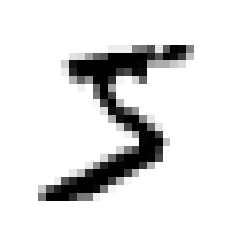

In [17]:
import matplotlib.pyplot as plt

x_train = x_train.reshape(60000, 28, 28)

plt.figure()
plt.imshow(x_train[0], cmap=plt.cm.binary)
# plt.colorbar()
plt.grid(False)
plt.axis('off')
plt.show()

In [38]:
# 데이터 로드 다시 하기
(x_train, y_train) , (x_test, y_test) = keras.datasets.mnist.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [39]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [40]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [41]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 784), (60000, 10), (10000, 784), (10000, 10))

In [42]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                  test_size = 0.3,
                                                  random_state = 100)

In [43]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((42000, 784), (42000, 10), (10000, 784), (10000, 10))

#### 모델을 구성하는 두 번째 방법
- 함수형 API

In [44]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Sequential, Model

input = keras.layers.Input(shape=(784,), name='input')

# model.add( keras.layers.Dense(256 , activation='sigmoid', input_shape=(784, ), name='input') ) # input layer

hidden1 = Dense(256, activation='sigmoid', name='hidden1')(input)
hidden2 = Dense(128, activation='sigmoid', name='hidden2')(hidden1)
hidden3 = Dense(64, activation='sigmoid', name='hidden3')(hidden2)
hidden4 = Dense(32, activation='sigmoid', name='hidden4')(hidden3)

output  = Dense(10, activation='softmax', name='output')(hidden4)

model = Model(inputs=[input] , outputs=[output])

In [45]:
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 784)]             0         
_________________________________________________________________
hidden1 (Dense)              (None, 256)               200960    
_________________________________________________________________
hidden2 (Dense)              (None, 128)               32896     
_________________________________________________________________
hidden3 (Dense)              (None, 64)                8256      
_________________________________________________________________
hidden4 (Dense)              (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total params: 244,522
Trainable params: 244,522
Non-trainable params: 0
_____________________________________________________

In [46]:
from tensorflow.keras.optimizers import SGD

optimizer = SGD(learning_rate=0.01)
model.compile(optimizer = optimizer,
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'] ) 

In [65]:
history = model.fit(x_train, y_train, batch_size = 128, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
329/329 [==============================] - 1s 4ms/step - loss: 0.1368 - accuracy: 0.9726 - val_loss: 0.2379 - val_accuracy: 0.9370
Epoch 2/10
329/329 [==============================] - 1s 3ms/step - loss: 0.1335 - accuracy: 0.9735 - val_loss: 0.2398 - val_accuracy: 0.9379
Epoch 3/10
329/329 [==============================] - 1s 3ms/step - loss: 0.1296 - accuracy: 0.9744 - val_loss: 0.2341 - val_accuracy: 0.9380
Epoch 4/10
329/329 [==============================] - 1s 3ms/step - loss: 0.1268 - accuracy: 0.9755 - val_loss: 0.2316 - val_accuracy: 0.9383
Epoch 5/10
329/329 [==============================] - 1s 4ms/step - loss: 0.1241 - accuracy: 0.9762 - val_loss: 0.2341 - val_accuracy: 0.9376
Epoch 6/10
329/329 [==============================] - 1s 3ms/step - loss: 0.1216 - accuracy: 0.9767 - val_loss: 0.2304 - val_accuracy: 0.9379
Epoch 7/10
329/329 [==============================] - 1s 3ms/step - loss: 0.1147 - accuracy: 0.9784 - val_loss: 0.2334 - val_accuracy: 0.9375
Epoch 

In [48]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [49]:
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

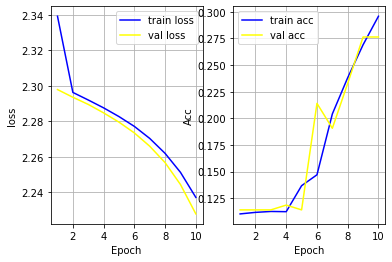

In [55]:
fig = plt.figure()
ax01 = fig.add_subplot(1, 2, 1)
ax02 = fig.add_subplot(1, 2, 2)

epochs = range(1, len(loss)+1)

ax01.plot(epochs, loss, color='blue', label='train loss')
ax01.plot(epochs, val_loss, color='yellow', label='val loss')
ax01.set_xlabel('Epoch')
ax01.set_ylabel('loss')
ax01.grid()
ax01.legend()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

ax02.plot(epochs, acc, color='blue', label='train acc')
ax02.plot(epochs, val_acc, color='yellow', label='val acc')
ax02.set_xlabel('Epoch')
ax02.set_ylabel('Acc')
ax02.grid()
ax02.legend()

In [56]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 2.2273 - accuracy: 0.2765


[2.2272989749908447, 0.27649998664855957]